# DATASET COMPETIÇÃO - ENERGIA

In [1641]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
import regex as re
import plotly.express as px
%matplotlib inline

# Preparação de Dados (Pré-processamento)

In [1642]:

#by default, read_csv treats None as NaN
allowed_nan =['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN',
                '-NaN', '-nan', '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA',
                'NULL', 'NaN', 'n/a', 'nan', 'null']

# 4 DATASETS DE TREINO (2 energia, 2 meteo)
energia1 = pd.read_csv('energia_202109-202112.csv',na_values=allowed_nan,encoding = 'latin-1',keep_default_na=False) 
energia2 = pd.read_csv('energia_202201-202212.csv',na_values=allowed_nan,encoding = 'latin-1',keep_default_na=False)
meteo1 = pd.read_csv('meteo_202109-202112.csv',encoding = 'latin-1')
meteo2 = pd.read_csv('meteo_202201-202212.csv',encoding = 'latin-1')

# 2 DATASETS DE TESTE (1 energia, 1 meteo)
energia3 = pd.read_csv('energia_202301-202304.csv',na_values=allowed_nan,encoding = 'latin-1',keep_default_na=False)
meteo3 = pd.read_csv('meteo_202301-202304.csv',encoding = 'latin-1')

energia = pd.concat([energia1, energia2], ignore_index=True)
# CONCATENACAO DOS DOIS DATASETS DE ENERGIA
def joinzero(s):
    if len(s) == 1:
        return '0' + s
    else:
        return s
    
energia['Hora'] = energia['Hora'].astype(str)
energia['Hora'] = energia['Hora'].apply(joinzero)
energia['Data'] = energia['Data']+" "+energia['Hora']
energia.drop(labels=['Hora'],axis=1,inplace=True)

meteo = pd.concat([meteo1,meteo2],ignore_index=True)
# CONCATENACAO DOS DOIS DATASETS DE METEREOLOGIA

def cleanTime(s):
    s['dt_iso'] = s['dt_iso'].str.replace(r'(\w+)-(\w+)-(\w+) (\w+).+', r'\1-\2-\3 \4', regex=True)
    
cleanTime(meteo)

meteo = meteo.rename(columns={'dt_iso': 'Data'})
energiPro = energia.merge(meteo,how="inner",on=["Data"])

###################### DATASETS DE TESTE ######################
energia3['Hora'] = energia3['Hora'].astype(str)
energia3['Hora'] = energia3['Hora'].apply(joinzero)
energia3['Data'] = energia3['Data']+" "+energia3['Hora']
energia3.drop(labels=['Hora'],axis=1,inplace=True)

cleanTime(meteo3)
meteo3 = meteo3.rename(columns={'dt_iso': 'Data'})
testEnergiPro = energia3.merge(meteo3,how="left",on=["Data"]) # do left join
###############################################################

#### Tratamento de Missing Values, Valores duplicados, Conversão de tipo de dados

CONTAGEM DE MISSING VALUES POR CADA ATRIBUTO
---------------------------------------
Data                           0
Normal (kWh)                   0
Horário Económico (kWh)        0
Autoconsumo (kWh)              0
Injeção na rede (kWh)          0
dt                             0
city_name                      0
temp                           0
feels_like                     0
temp_min                       0
temp_max                       0
pressure                       0
sea_level                  11016
grnd_level                 11016
humidity                       0
wind_speed                     0
rain_1h                     8732
clouds_all                     0
weather_description            0
dtype: int64


<Axes: >

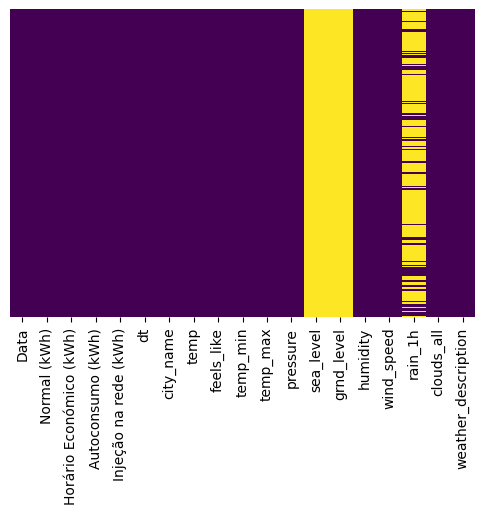

In [1643]:
plt.figure(figsize=(6,4))

# VERIFICAR O NÚMERO DE MISSING VALUES DE CADA ATRIBUTO
print("CONTAGEM DE MISSING VALUES POR CADA ATRIBUTO")
print("---------------------------------------")
print(energiPro.isnull().sum())

# Heatmap para averiguar graficamente os missing values
sns.heatmap(energiPro.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Média de rain_1h por Descrição de Tempo

In [1644]:
print(energiPro.groupby(by=['weather_description'])['rain_1h'].agg(lambda x: np.nanmean(x)))

weather_description
broken clouds                NaN
few clouds                   NaN
heavy intensity rain    5.151667
light rain              0.383099
moderate rain           1.961068
overcast clouds              NaN
scattered clouds             NaN
sky is clear                 NaN
Name: rain_1h, dtype: float64


C:\Users\joaop\AppData\Local\Temp\ipykernel_17176\3236808479.py:1: RuntimeWarning:

Mean of empty slice



In [1645]:
# 1º REMOVER A COLUNA sea_level e grnd_level
# 2º SUBSTITUIR OS VALORES DE rain_1h por 0
energiPro.drop(labels=['sea_level','grnd_level'],axis=1,inplace=True)
# atributos : Data e dt possuem o mesmo conceito de marca temporal pelo que vamos remover 
energiPro.drop(labels=['dt'],axis=1,inplace=True)
energiPro1 = energiPro
#energiPro1['rain_1h'] = energiPro1['rain_1h'].fillna(0) 
energiPro1['Injeção na rede (kWh)'] = energiPro1['Injeção na rede (kWh)'].astype(str)
energiPro1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Normal (kWh)             11016 non-null  float64
 2   Horário Económico (kWh)  11016 non-null  float64
 3   Autoconsumo (kWh)        11016 non-null  float64
 4   Injeção na rede (kWh)    11016 non-null  object 
 5   city_name                11016 non-null  object 
 6   temp                     11016 non-null  float64
 7   feels_like               11016 non-null  float64
 8   temp_min                 11016 non-null  float64
 9   temp_max                 11016 non-null  float64
 10  pressure                 11016 non-null  int64  
 11  humidity                 11016 non-null  int64  
 12  wind_speed               11016 non-null  float64
 13  rain_1h                  2284 non-null   float64
 14  clouds_all            

### Averiguar a existência de atributos com apenas 1 valor

In [1646]:
energiPro1.nunique()

Data                       11016
Normal (kWh)                1282
Horário Económico (kWh)      851
Autoconsumo (kWh)            752
Injeção na rede (kWh)          5
city_name                      1
temp                        2382
feels_like                  2670
temp_min                     481
temp_max                     545
pressure                      41
humidity                      82
wind_speed                   771
rain_1h                      367
clouds_all                   101
weather_description            8
dtype: int64

In [1647]:
# Remover a city_name já que só temos 1 valor e não acrescenta em nada ao conhecimento
energiPro1 = energiPro.drop(labels=['city_name'],axis=1)

In [1648]:
print("Linhas duplicadas:"+str(energiPro1.duplicated().sum()))
#sns.pairplot(energiPro1)

Linhas duplicadas:0


### Consulta de outliers 


In [1649]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=3, cols=4, subplot_titles=("Horário Económico (kWh)", "Normal (kWh)", "Autoconsumo (kWh)", "Pressure"))
fig1 = px.box(energiPro1, y="Normal (kWh)")
fig2 = px.box(energiPro1, y="Horário Económico (kWh)")
fig3 = px.box(energiPro1, y="Autoconsumo (kWh)")
fig4 = px.box(energiPro1, y="temp")
fig5 = px.box(energiPro1, y="feels_like")
fig6 = px.box(energiPro1, y="temp_min")
fig7 = px.box(energiPro1, y="temp_max")
fig8 = px.box(energiPro1, y="pressure")
fig9 = px.box(energiPro1, y="humidity")
fig10 = px.box(energiPro1, y="wind_speed")
fig11 = px.box(energiPro1, y="rain_1h")
fig12 = px.box(energiPro1, y="clouds_all")

fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig3.data[0], row=1, col=3)
fig.add_trace(fig4.data[0], row=1, col=4)
fig.add_trace(fig5.data[0], row=2, col=1)
fig.add_trace(fig6.data[0], row=2, col=2)
fig.add_trace(fig7.data[0], row=2, col=3)
fig.add_trace(fig8.data[0], row=2, col=4)
fig.add_trace(fig9.data[0], row=3, col=1)
fig.add_trace(fig10.data[0], row=3, col=2)
fig.add_trace(fig11.data[0], row=3, col=3)
fig.add_trace(fig12.data[0], row=3, col=4)

fig.update_layout(showlegend=False)

fig.show()

In [1650]:
cols = ["Normal (kWh)","Horário Económico (kWh)","Autoconsumo (kWh)","temp","feels_like","temp_min","temp_max","pressure","humidity","wind_speed","rain_1h","clouds_all"]
energiPro2 = energiPro1.copy()

def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum()

outlier_counts = {}
for col in cols:
    outlier_count = count_outliers(energiPro2[col])
    outlier_counts[col] = outlier_count


for col, count in outlier_counts.items():
    print(f"Nº de outliers em '{col}': {count}")

Nº de outliers em 'Normal (kWh)': 752
Nº de outliers em 'Horário Económico (kWh)': 323
Nº de outliers em 'Autoconsumo (kWh)': 306
Nº de outliers em 'temp': 271
Nº de outliers em 'feels_like': 269
Nº de outliers em 'temp_min': 127
Nº de outliers em 'temp_max': 365
Nº de outliers em 'pressure': 311
Nº de outliers em 'humidity': 63
Nº de outliers em 'wind_speed': 350
Nº de outliers em 'rain_1h': 204
Nº de outliers em 'clouds_all': 0


## Visualização de dados

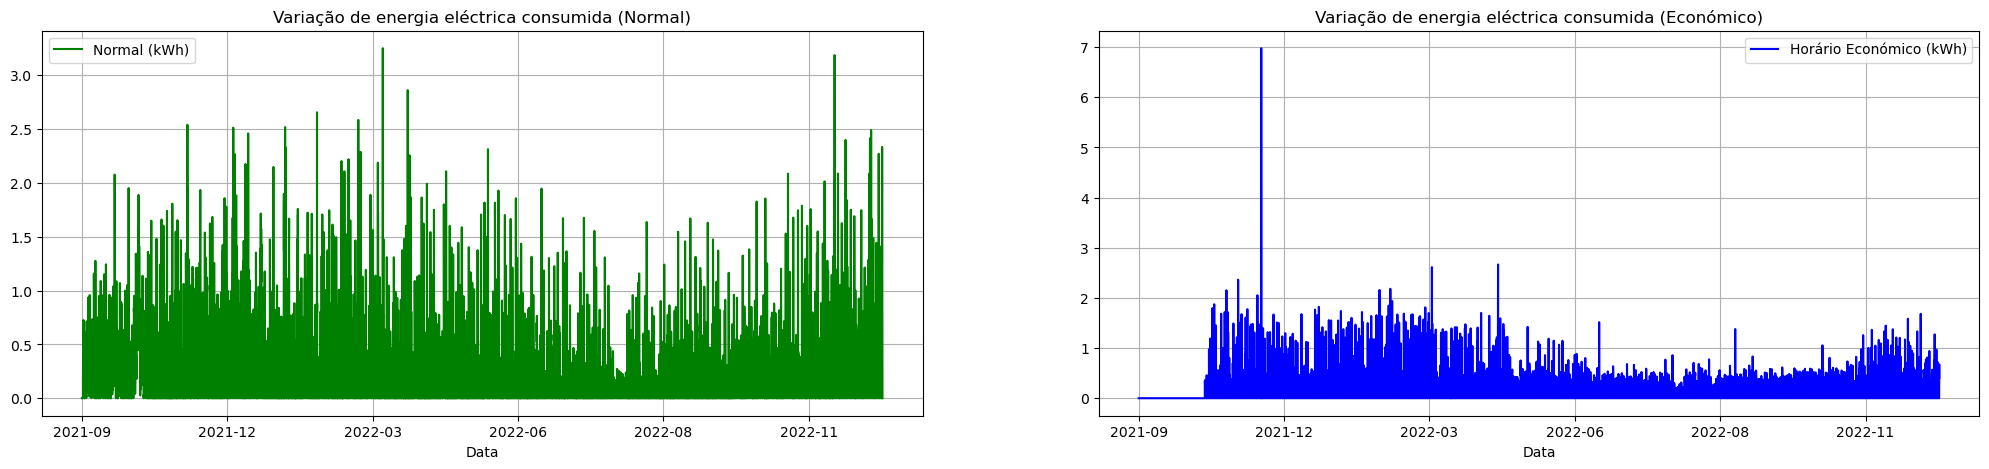

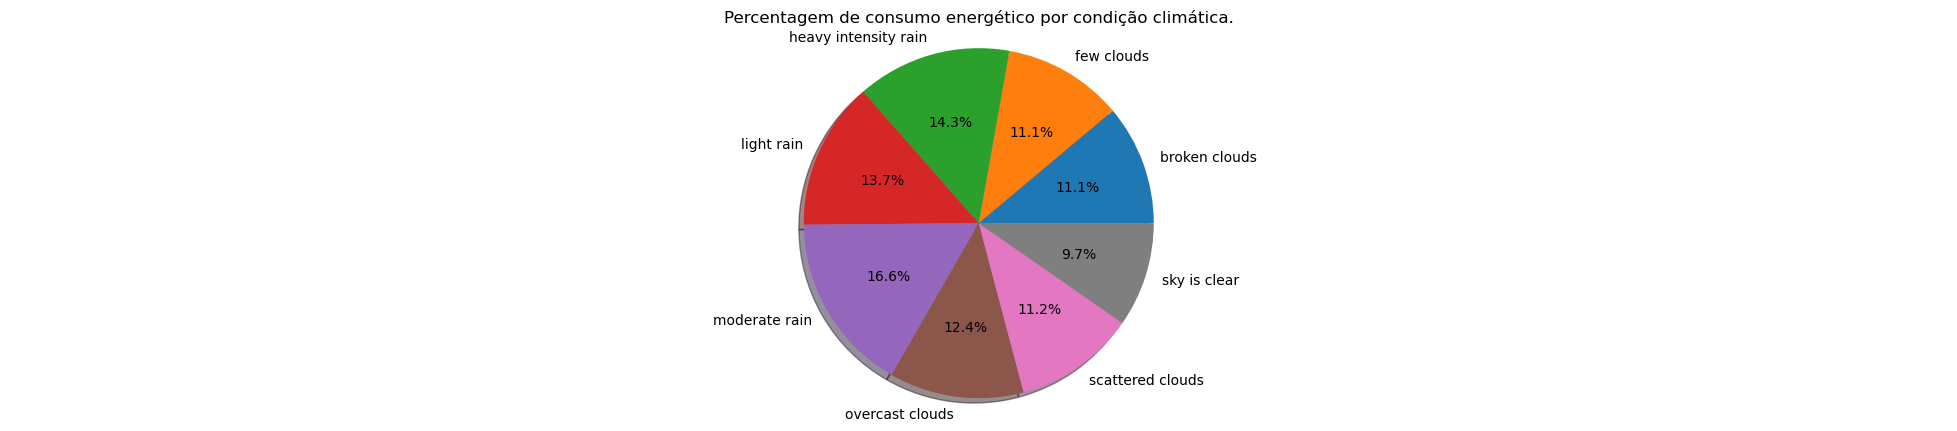

In [1651]:
def filtra_colunas(set,coluna1,coluna2):
    return set[[coluna1,coluna2]]

def replace_coluna(set):
    return set['Data'].str.replace(r'(\w+)-(\w+)-(\w+) (\w+).+', r'\1-\2', regex=True)

figure, axis = plt.subplots(1, 2) 
matplotlib.rcParams['figure.figsize']=[25.0,5.0]

filtered_datanormal = filtra_colunas(energiPro1,"Data", "Normal (kWh)")
filtered_datanormal['Data'] = replace_coluna(filtered_datanormal)
data_set1 = filtered_datanormal.set_index('Data')
data_set1.plot(grid=True,title='Variação de energia eléctrica consumida (Normal)',color='green',ax=axis[0])


filtered_dataeconomico = filtra_colunas(energiPro1,"Data", "Horário Económico (kWh)")
filtered_dataeconomico['Data'] = replace_coluna(filtered_datanormal)
data_set2 = filtered_dataeconomico.set_index('Data')
data_set2.plot(grid=True,title='Variação de energia eléctrica consumida (Económico)',color='blue',ax=axis[1])

weathgroups = energiPro1.groupby(by=['weather_description']).agg({'Normal (kWh)':pd.Series.mean})
fig1,ax1 = plt.subplots()

percent = [float(weathgroups['Normal (kWh)'][var_cat]) for var_cat in weathgroups['Normal (kWh)'].keys().to_list()]
ax1.pie(percent,labels=weathgroups.index.to_list(),autopct='%1.1f%%',shadow=True)
ax1.axis('equal')
ax1.set_title('Percentagem de consumo energético por condição climática.')
plt.show()


In [1652]:
plt.figure(figsize=(12,7))
fig = px.histogram(energiPro1, x='weather_description',title="Distribuição qualitativa do tempo horária entre 2021-09 a 2022-12")
fig.show()

<Figure size 1200x700 with 0 Axes>

In [1653]:
energiPro1.head(20)

,Data,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2021-09-29 00,0.000,0.0,0.000,None,13.97,13.54,11.45,14.04,1027,81,1.96,NaN,87,overcast clouds
1,2021-09-29 01,0.000,0.0,0.000,None,13.48,13.02,13.43,13.90,1028,82,1.83,NaN,91,overcast clouds
2,2021-09-29 02,0.000,0.0,0.000,None,12.93,12.47,12.72,13.43,1027,84,1.96,NaN,93,overcast clouds
3,2021-09-29 03,0.000,0.0,0.000,None,12.61,12.15,10.34,12.93,1027,85,1.85,NaN,95,overcast clouds
4,2021-09-29 04,0.000,0.0,0.000,None,12.61,12.17,9.79,12.93,1027,86,1.83,NaN,93,overcast clouds
5,2021-09-29 05,0.000,0.0,0.000,None,12.62,12.16,11.72,12.93,1028,85,2.04,NaN,90,overcast clouds
6,2021-09-29 06,0.000,0.0,0.000,None,12.61,12.09,11.12,12.93,1028,83,1.98,NaN,83,broken clouds
7,2021-09-29 07,0.000,0.0,0.000,None,13.27,12.69,10.34,13.48,1028,78,2.34,NaN,87,overcast clouds
8,2021-09-29 08,0.000,0.0,0.000,None,16.14,15.77,11.77,16.26,1029,75,2.15,NaN,65,broken clouds
9,2021-09-29 09,0.000,0.0,0.000,None,18.85,18.54,15.57,19.04,1029,67,1.76,NaN,18,few clouds


### Estudo da correlação de atributos

A presença de atributos correlacionados entre si pode causar problemas, como por exemplo multicolinearidade, que podem afetar negativamente o desempenho do modelo e a interpretação dos resultados. 

<Axes: >

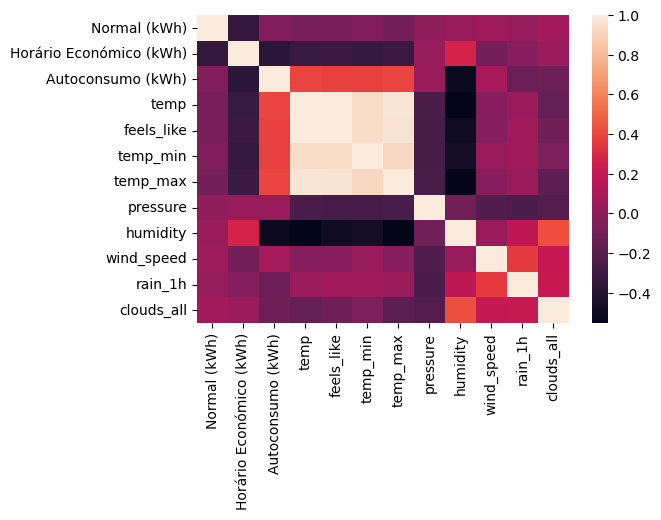

In [1654]:
plt.figure(figsize=(6,4))
sns.heatmap(energiPro1.corr(numeric_only=True))

### Remoção de atributos correlacionados entre si

<Axes: >

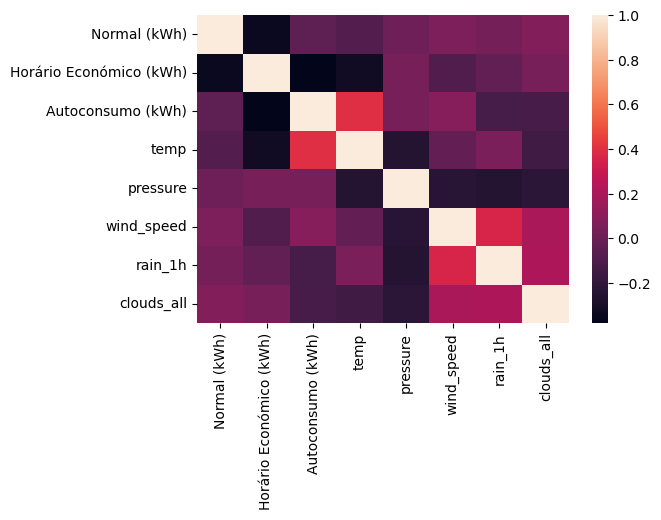

In [1655]:
energiPro3 = energiPro1.copy()
energiPro3.drop(columns=['temp_min'],axis=1,inplace=True)
energiPro3.drop(columns=['temp_max'],axis=1,inplace=True)
energiPro3.drop(columns=['feels_like'],axis=1,inplace=True)
energiPro3.drop(columns=['humidity'],axis=1,inplace=True)
plt.figure(figsize=(6,4))
sns.heatmap(energiPro3.corr(numeric_only=True))

## Implementação de um modelo de Decision Tree Classifier

### Pré-processamento
Consultar os diferentes tipos de categorias de weather description

In [1656]:
energiPro3['weather_description']. unique() 

array(['overcast clouds', 'broken clouds', 'few clouds', 'sky is clear',
       'scattered clouds', 'light rain', 'moderate rain',
       'heavy intensity rain'], dtype=object)

Converter o atributo weather_description para um tipo númerico para proceder posteriormente ao fit do modelo

In [1657]:
energiPro3['weather_description']=energiPro3['weather_description'].map({'sky is clear': 1, 'few clouds': 2,'scattered clouds':3,'broken clouds':4,'overcast clouds':5,'light rain':6,'moderate rain':7,'heavy intensity rain':8})

Conversão da coluna 'Data' para o tipo dd-mm de forma a apresentar dados periódicos

In [1658]:
pd.options.mode.chained_assignment = None
energiPro3['Data']=energiPro3['Data'].str.replace(r'(\w+)-(\w+)-(\w+) (\w+).+', r'\2-\3', regex=True) 
import datetime
for ind in energiPro3.index:
    data = datetime.datetime.strptime(energiPro3['Data'][ind], '%m-%d')
    energiPro3['Data'][ind] = int(data.strftime("%m%d"))

### Estimativa do valor rain_1h por estado da descrição metereológica

<li>sky is clear: 0<br>
<li>few clouds: 0.05<br>
<li>scattered clouds: 0.1<br>
<li>broken clouds: 0.15<br>
<li>overcast clouds: 0.2<br>

In [1659]:
tab = energiPro3.groupby(by=['weather_description'])['rain_1h'].agg(lambda x: np.nanmean(x))
print(tab)
pd.options.mode.chained_assignment = None
for ind in energiPro3.index:
    if(energiPro3['weather_description'][ind]==4):
        energiPro3['rain_1h'][ind]=0.15
    if(energiPro3['weather_description'][ind]==2):
        energiPro3['rain_1h'][ind]=0.05
    if(energiPro3['weather_description'][ind]==5):
        energiPro3['rain_1h'][ind]=0.2
    if(energiPro3['weather_description'][ind]==3):
        energiPro3['rain_1h'][ind]=0.1
    if(energiPro3['weather_description'][ind]==1):
        energiPro3['rain_1h'][ind]=0
    if(energiPro3['weather_description'][ind]==8):
        energiPro3['rain_1h'][ind]=float(tab[8])
    if(energiPro3['weather_description'][ind]==6):
        energiPro3['rain_1h'][ind]=float(tab[6])
    if(energiPro3['weather_description'][ind]==7):
        energiPro3['rain_1h'][ind]=float(tab[7])

C:\Users\joaop\AppData\Local\Temp\ipykernel_17176\247207391.py:1: RuntimeWarning:

Mean of empty slice



weather_description
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6    0.383099
7    1.961068
8    5.151667
Name: rain_1h, dtype: float64


In [1660]:
energiPro3.isnull().sum()

Data                       0
Normal (kWh)               0
Horário Económico (kWh)    0
Autoconsumo (kWh)          0
Injeção na rede (kWh)      0
temp                       0
pressure                   0
wind_speed                 0
rain_1h                    0
clouds_all                 0
weather_description        0
dtype: int64

## Definição do X e Y

Precisámos de definir o nosso input e o nossos atributos target.<br>
x vai ser usado para identificar o input.<br>
y vai ser usado para identificar o target.<br>

In [1661]:
x_dtc = energiPro3.drop(['Injeção na rede (kWh)'],axis=1)
y_dtc = energiPro3['Injeção na rede (kWh)'].to_frame()


## Train/Test split

In [1662]:
from sklearn.model_selection import train_test_split
xtrain_dtc, xtest_dtc, ytrain_dtc, ytest_dtc = train_test_split(x_dtc,y_dtc,test_size=0.3,random_state=1234)

print("X_TRAIN: %s\nY_TRAIN: %s\nX_TEST: %s\nY_TEST: %s\n" %(xtrain_dtc.shape,ytrain_dtc.shape,xtest_dtc.shape,ytest_dtc.shape))

X_TRAIN: (7711, 10)
Y_TRAIN: (7711, 1)
X_TEST: (3305, 10)
Y_TEST: (3305, 1)



## Model Fitting

In [1663]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1234)

### Fitting do modelo

In [1664]:
clf.fit(xtrain_dtc,ytrain_dtc)

DecisionTreeClassifier(random_state=1234)

Com o modelo ajustado, podemos usar a função predict para obter uma previsão de injeção para a rede para cada observação no conjunto de teste

In [1665]:
predictions_dtc1 = clf.predict(xtest_dtc)
print(predictions_dtc1)

['None' 'None' 'None' ... 'Very High' 'Medium' 'None']


### Métricas de Qualidade e Avaliação do Modelo

              precision    recall  f1-score   support

        High       0.55      0.53      0.54       337
         Low       0.28      0.30      0.29       135
      Medium       0.45      0.44      0.45       313
        None       0.96      0.96      0.96      2331
   Very High       0.46      0.47      0.46       189

    accuracy                           0.82      3305
   macro avg       0.54      0.54      0.54      3305
weighted avg       0.81      0.82      0.81      3305



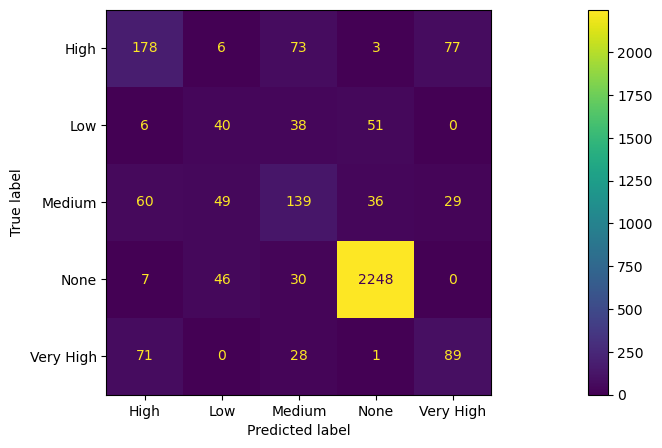

In [1666]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

print(classification_report(ytest_dtc,predictions_dtc1))

ConfusionMatrixDisplay.from_predictions(ytest_dtc,predictions_dtc1)
plt.show()

In [1667]:
from sklearn.model_selection import cross_val_score, KFold
folds = 5
dt_scores = cross_val_score(clf, x_dtc, y_dtc, cv = folds)
print("DECISION TREE WITH CROSS VALIDATION WITH %0.0f folds: %0.2f ACCURACY" % (folds,dt_scores.mean()))


DECISION TREE WITH CROSS VALIDATION WITH 5 folds: 0.77 ACCURACY


### Previsão da Injeção da rede entre 2023-01 a 2023-04

#### Pré-processamento do dataset de teste

In [1668]:
testEnergiPro.drop(labels=['sea_level','grnd_level'],axis=1,inplace=True)
# atributos : Data e dt possuem o mesmo conceito de marca temporal pelo que vamos remover 
testEnergiPro.drop(labels=['dt'],axis=1,inplace=True)

pd.options.mode.chained_assignment = None
testEnergiPro['Data']=testEnergiPro['Data'].str.replace(r'(\w+)-(\w+)-(\w+) (\w+).+', r'\2-\3', regex=True) 
import datetime
for ind in testEnergiPro.index:
    data = datetime.datetime.strptime(testEnergiPro['Data'][ind], '%m-%d')
    testEnergiPro['Data'][ind] = int(data.strftime("%m%d"))

#testEnergiPro['rain_1h'] = testEnergiPro['rain_1h'].fillna(0) 
testEnergiPro = testEnergiPro.drop(labels=['city_name'],axis=1)

def interpolatecol(set,col):
    set[col].interpolate(method='linear', inplace=True)
cols = ["temp","feels_like","temp_min","temp_max","pressure","humidity","wind_speed","clouds_all"]
for col in cols:
    interpolatecol(testEnergiPro,col)
usualweather = testEnergiPro['weather_description'].mode()[0] # pass only the scalar
testEnergiPro['weather_description'].fillna(usualweather,inplace=True)

In [1669]:
testEnergiPro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Normal (kWh)             2256 non-null   float64
 2   Horário Económico (kWh)  2256 non-null   float64
 3   Autoconsumo (kWh)        2256 non-null   float64
 4   temp                     2256 non-null   float64
 5   feels_like               2256 non-null   float64
 6   temp_min                 2256 non-null   float64
 7   temp_max                 2256 non-null   float64
 8   pressure                 2256 non-null   float64
 9   humidity                 2256 non-null   float64
 10  wind_speed               2256 non-null   float64
 11  rain_1h                  206 non-null    float64
 12  clouds_all               2256 non-null   float64
 13  weather_description      2256 non-null   object 
dtypes: float64(12), object(2

In [1670]:
testEnergiPro2 = testEnergiPro.copy()
testEnergiPro2.drop(columns=['temp_min'],axis=1,inplace=True)
testEnergiPro2.drop(columns=['temp_max'],axis=1,inplace=True)
testEnergiPro2.drop(columns=['feels_like'],axis=1,inplace=True)
testEnergiPro2.drop(columns=['humidity'],axis=1,inplace=True)
#testEnergiPro2.drop(columns=['Data'],axis=1,inplace=True)

tab = testEnergiPro2.groupby(by=['weather_description'])['rain_1h'].agg(lambda x: np.nanmean(x))

pd.options.mode.chained_assignment = None
for ind in testEnergiPro2.index:
    if(testEnergiPro2['weather_description'][ind]=="broken clouds"):
        testEnergiPro2['rain_1h'][ind]=0.15
    if(testEnergiPro2['weather_description'][ind]=="few clouds"):
        testEnergiPro2['rain_1h'][ind]=0.05
    if(testEnergiPro2['weather_description'][ind]=="overcast clouds"):
        testEnergiPro2['rain_1h'][ind]=0.2
    if(testEnergiPro2['weather_description'][ind]=="scattered clouds"):
        testEnergiPro2['rain_1h'][ind]=0.1
    if(testEnergiPro2['weather_description'][ind]=="sky is clear"):
        testEnergiPro2['rain_1h'][ind]=0
    if(testEnergiPro2['weather_description'][ind]=="heavy intensity rain"):
        testEnergiPro2['rain_1h'][ind]=float(tab['heavy intensity rain'])
    if(testEnergiPro2['weather_description'][ind]=="light rain"):
        testEnergiPro2['rain_1h'][ind]=float(tab['light rain'])
    if(testEnergiPro2['weather_description'][ind]=="moderate rain"):
        testEnergiPro2['rain_1h'][ind]=float(tab['moderate rain'])

testEnergiPro2['weather_description']=testEnergiPro2['weather_description'].map({'sky is clear': 1, 'few clouds': 2,'scattered clouds':3,'broken clouds':4,'overcast clouds':5,'light rain':6,'moderate rain':7,'heavy intensity rain':8})

C:\Users\joaop\AppData\Local\Temp\ipykernel_17176\2288408136.py:8: RuntimeWarning:

Mean of empty slice



In [1671]:
testEnergiPro2.isnull().sum()

Data                       0
Normal (kWh)               0
Horário Económico (kWh)    0
Autoconsumo (kWh)          0
temp                       0
pressure                   0
wind_speed                 0
rain_1h                    0
clouds_all                 0
weather_description        0
dtype: int64

### Resultado da previsão de 2023 - Modelo de Árvore de Decisão

In [1672]:
predictions_dtc2 = clf.predict(testEnergiPro2)
prevision2023 = pd.DataFrame()
prevision2023['Result']=predictions_dtc2
prevision2023['RowId'] = list(range(1,len(prevision2023['Result'])+1))
prevision2023 = prevision2023[['RowId','Result']]

from pathlib import Path

output_file = 'ficheiro_submissao.csv'
output_dir = Path('prevision-dt/') # prevision decision tree folder

output_dir.mkdir(parents=True, exist_ok=True)
prevision2023.to_csv(output_dir / output_file,index=False) 

## Implementação de um modelo de Random Forest 

### Data Acquisition

In [1673]:
rf_dataset = energiPro3.copy()

### Data Preparation

Proceder à técnica de one-hot encoding para a coluna 'Injeção na rede (kWh)'.<br>
Tratamento dos valores Nan da coluna 'rain_1h'. 

In [1674]:
label = rf_dataset['Injeção na rede (kWh)'].to_frame()
features = rf_dataset.drop(['Injeção na rede (kWh)'],axis=1)

# One-hot encode of the label using pandas get_dummies
label = rf_dataset['Injeção na rede (kWh)'].map({'None': 1, 'Low': 2,'Medium':3,'High':4,'Very High':5})
tab = features.groupby(by=['weather_description'])['rain_1h'].agg(lambda x: np.nanmean(x))
print(tab)
pd.options.mode.chained_assignment = None
for ind in features.index:
    if(features['weather_description'][ind] == 4):
        features['rain_1h'][ind]=0.15
    if(features['weather_description'][ind] == 2):
        features['rain_1h'][ind]=0.05
    if(features['weather_description'][ind] == 5):
        features['rain_1h'][ind]=0.2
    if(features['weather_description'][ind] == 3):
        features['rain_1h'][ind]=0.1
    if(features['weather_description'][ind] == 1):
        features['rain_1h'][ind]=0
    if(features['weather_description'][ind] == 8):
        features['rain_1h'][ind]=tab[8]
    if(features['weather_description'][ind] == 6):
        features['rain_1h'][ind]=tab[6]
    if(features['weather_description'][ind] == 7):
        features['rain_1h'][ind]=tab[7]

label


weather_description
1    0.000000
2    0.050000
3    0.100000
4    0.150000
5    0.200000
6    0.383099
7    1.961068
8    5.151667
Name: rain_1h, dtype: float64


0        1
1        1
2        1
3        1
4        1
        ..
11011    1
11012    1
11013    1
11014    1
11015    1
Name: Injeção na rede (kWh), Length: 11016, dtype: int64

In [1675]:
features.isnull().sum()

Data                       0
Normal (kWh)               0
Horário Económico (kWh)    0
Autoconsumo (kWh)          0
temp                       0
pressure                   0
wind_speed                 0
rain_1h                    0
clouds_all                 0
weather_description        0
dtype: int64

### Training and Testing Sets

In [1676]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
rftrain_features, rftest_features, rftrain_label, rftest_label= train_test_split(features, label, test_size = 0.3, random_state = 1234,stratify=label)

### Train Model

In [1677]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 500, max_depth = 5, max_features = 14, bootstrap = True, random_state = 1234)

rf.fit(rftrain_features, rftrain_label)

RandomForestRegressor(max_depth=5, max_features=14, n_estimators=500,
                      random_state=1234)

### Predict the test set

In [1678]:
# Use the forest's predict method on the test data
prediction = rf.predict(rftest_features)

### Avaliation metrics

In [1679]:
from sklearn.metrics import mean_squared_error,r2_score

errors = abs(rftest_label- prediction)
print('MAE:', round(np.mean(errors), 2))

rmse = mean_squared_error(rftest_label, prediction, squared=False)
print('MSE:', round(rmse, 2))

rmse = mean_squared_error(rftest_label, prediction, squared=True)
print('RMSE:', round(rmse, 2))

r2 = r2_score(rftest_label, prediction) 
print('R^2:', round(r2, 2))


MAE: 0.21
MSE: 0.43
RMSE: 0.18
R^2: 0.89


### Get and check data from test set from 2023-01 to 2023-04

In [1680]:
testEnergiRF = testEnergiPro2.copy()
testEnergiRF.isnull().sum()


Data                       0
Normal (kWh)               0
Horário Económico (kWh)    0
Autoconsumo (kWh)          0
temp                       0
pressure                   0
wind_speed                 0
rain_1h                    0
clouds_all                 0
weather_description        0
dtype: int64

### Resultado da previsão de 2023 - Modelo de Random Forest

In [1681]:
predictions_rf2023 = rf.predict(testEnergiRF)
mapInjecao = {1:"None",2:"Low",3:"Medium",4:"High",5:"Very High"}
result = []

for i in range(0,len(predictions_rf2023)):
    result.append(mapInjecao[int(round(predictions_rf2023[i]))])

rf_prevision2023 = pd.DataFrame()
rf_prevision2023['Result']=result
rf_prevision2023['RowId'] = list(range(1,len(rf_prevision2023['Result'])+1))
rf_prevision2023 = rf_prevision2023[['RowId','Result']]

from pathlib import Path

output_file = 'ficheiro_submissao.csv'
output_dir = Path('prevision-rf/') # prevision random forest

output_dir.mkdir(parents=True, exist_ok=True)
rf_prevision2023.to_csv(output_dir / output_file,index=False) 

In [1682]:
for i in predictions_rf2023:
    print(i)

1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.2409335026940527
1.8629894880315436
3.84731259951355
3.945786551259512
1.0000020472803166
3.0702453128921596
2.7972824134660397
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803166
1.0000020472803

## Support Vector Machine

In [1683]:
from sklearn.svm import SVC as SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
"""
energiPro4 = energiPro3.copy()

target = energiPro4['Injeção na rede (kWh)']
features = energiPro4.drop(['Injeção na rede (kWh)'],axis=1)

# Split dataset into training set and test set
xtrain_svm, xtest_svm, ytrain_svm, ytest_svm = train_test_split(features, target, test_size=0.3,random_state=2023) # 70% training and 30% test

#Create a svm Classifier

model = SVC(random_state=2023)

#Train the model using the training sets
model.fit(xtrain_svm, ytrain_svm)

#Predict the response for test dataset

predictions_svm = model.predict(xtest_svm)

print("%0.2f Accuracy:",accuracy_score(ytest_svm, predictions_svm))

print(classification_report(ytest_svm,predictions_svm))

ConfusionMatrixDisplay.from_predictions(ytest_svm,predictions_svm)
plt.show()

param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(random_state=2023),param_grid,refit=True,verbose=3)
grid.fit(xtrain_svm,ytrain_svm)

print(grid.best_params_)

print(grid.best_estimator_)

grid_predictions = grid.predict(xtest_svm)

print(classification_report(ytest_svm,grid_predictions))

ConfusionMatrixDisplay.from_predictions(ytest_svm,grid_predictions)
plt.show()"""

'\nenergiPro4 = energiPro3.copy()\n\ntarget = energiPro4[\'Injeção na rede (kWh)\']\nfeatures = energiPro4.drop([\'Injeção na rede (kWh)\'],axis=1)\n\n# Split dataset into training set and test set\nxtrain_svm, xtest_svm, ytrain_svm, ytest_svm = train_test_split(features, target, test_size=0.3,random_state=2023) # 70% training and 30% test\n\n#Create a svm Classifier\n\nmodel = SVC(random_state=2023)\n\n#Train the model using the training sets\nmodel.fit(xtrain_svm, ytrain_svm)\n\n#Predict the response for test dataset\n\npredictions_svm = model.predict(xtest_svm)\n\nprint("%0.2f Accuracy:",accuracy_score(ytest_svm, predictions_svm))\n\nprint(classification_report(ytest_svm,predictions_svm))\n\nConfusionMatrixDisplay.from_predictions(ytest_svm,predictions_svm)\nplt.show()\n\nparam_grid = {\'C\': [0.1, 1, 10, 100, 1000], \'gamma\': [1, 0.1, 0.01, 0.001, 0.0001],\'kernel\': [\'rbf\']}\n\nfrom sklearn.model_selection import GridSearchCV\ngrid = GridSearchCV(SVC(random_state=2023),param_gr

## Logistic Regression

In [1684]:
"""
energiPro5 = energiPro3.copy()

# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

# Pode ser feito com multi targets???????????? - Perguitar ao professor
energiPro5['None']=energiPro5['Injeção na rede (kWh)'].apply(lambda x: 1 if x == 'None' else 0)
energiPro5['Low']= energiPro5['Injeção na rede (kWh)'].apply(lambda x: 1 if x == 'Low' else 0)
energiPro5['Medium']= energiPro5['Injeção na rede (kWh)'].apply(lambda x: 1 if x == 'Medium' else 0)
energiPro5['High']= energiPro5['Injeção na rede (kWh)'].apply(lambda x: 1 if x == 'High' else 0) 
energiPro5['Very High']= energiPro5['Injeção na rede (kWh)'].apply(lambda x: 1 if x == 'Very High' else 0)   



energiPro5.drop(columns=['Injeção na rede (kWh)'],axis=1,inplace=True)
target = energiPro5[['None', 'Low', 'Medium', 'High', 'Very High']]
features = energiPro5.drop(['None', 'Low', 'Medium', 'High', 'Very High'],axis=1)

# Split dataset into training set and test set

xtrain_lr, xtest_lr, ytrain_lr, ytest_lr = train_test_split(features, target, test_size=0.3,random_state=2023) # 70% training and 30% test

# Create a Logistic Regression Classifier

lr = LogisticRegression(random_state=2023)

# Train the model using the training sets

lr.fit(xtrain_lr, ytrain_lr)

# Predict the response for test dataset
predictions_lr = lr.predict(xtest_lr)

print("%0.2f Accuracy:",accuracy_score(ytest_lr, predictions_lr))

print(classification_report(ytest_lr,predictions_lr))

ConfusionMatrixDisplay.from_predictions(ytest_lr,predictions_lr)

plt.show()"""


'\nenergiPro5 = energiPro3.copy()\n\n# Logistic Regression\n\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score\n\n# Pode ser feito com multi targets???????????? - Perguitar ao professor\nenergiPro5[\'None\']=energiPro5[\'Injeção na rede (kWh)\'].apply(lambda x: 1 if x == \'None\' else 0)\nenergiPro5[\'Low\']= energiPro5[\'Injeção na rede (kWh)\'].apply(lambda x: 1 if x == \'Low\' else 0)\nenergiPro5[\'Medium\']= energiPro5[\'Injeção na rede (kWh)\'].apply(lambda x: 1 if x == \'Medium\' else 0)\nenergiPro5[\'High\']= energiPro5[\'Injeção na rede (kWh)\'].apply(lambda x: 1 if x == \'High\' else 0) \nenergiPro5[\'Very High\']= energiPro5[\'Injeção na rede (kWh)\'].apply(lambda x: 1 if x == \'Very High\' else 0)   \n\n\n\nenergiPro5.drop(columns=[\'Injeção na rede (kWh)\'],axis=1,inplace=True)\ntarget